In [1]:
Columns = ["duration",
           "protocol_type",
           "service",
           "flag",
           "src_bytes",
           "dst_bytes",
           "land",
           "wrong_fragment",
           "urgent",
           "hot",
           "num_failed_logins",
           "logged_in",
           "num_compromised",
           "root_shell",
           "su_attempted",
           "num_root",
           "num_file_creations",
           "num_shells",
           "num_access_files",
           "num_outbound_cmds",
           "is_host_login",
           "is_guest_login",
           "count",
           "srv_count",
           "serror_rate",
           "srv_serror_rate",
           "rerror_rate",
           "srv_rerror_rate",
           "same_srv_rate",
           "diff_srv_rate",
           "srv_diff_host_rate",
           "dst_host_count",
           "dst_host_srv_count",
           "dst_host_same_srv_rate",
           "dst_host_diff_srv_rate",
           "dst_host_same_src_port_rate",
           "dst_host_srv_diff_host_rate",
           "dst_host_serror_rate",
           "dst_host_srv_serror_rate",
           "dst_host_rerror_rate",
           "dst_host_srv_rerror_rate",
           "attack_type",
           "difficulty"]

#Data_path = "/Users/ppx/Desktop/gitELECOM/NSL-KDD/"
Data_path = "/home/peseux/Desktop/gitELECOM/NSL-KDD/"
File_name = "KDDTrain+.txt"

Nrows = 100
Attack = "neptune"


Numerical_columns = ["duration", "src_bytes", "dst_bytes", "wrong_fragment", "urgent", "hot", "num_failed_logins","num_compromised","num_root",
                     "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate"]




In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


def turn_attack(x):
    if x == "normal":
        return 0.
    else:
        return 1.


def loadingKDD(path=Data_path+File_name, nrows=Nrows, attack_mode=True,
               numerical_columns=Numerical_columns, columns=Columns, attack=Attack):
    df = pd.read_csv(path, names=columns, nrows=nrows)
    return df

    if attack_mode is None:
        pass
    elif attack_mode:
        if attack is None:
            df = df[(df.attack_type != "normal")]
        else:
            df = df[(df.attack_type == attack)]
    else:
        df = df[df.attack_type == "normal"]
    df.attack_type = df.attack_type.apply(turn_attack)
    nc = numerical_columns + ["land", "logged_in",
                              "root_shell",
                              "is_host_login", "is_guest_login"]
    df_numerical = df[nc]
    df_numerical.reset_index(drop=True, inplace=True)

    categorical_columns = ["protocol_type","flag", "service", "su_attempted"]
    df_one_hot_encoding = df[categorical_columns]
    df_one_hot_encoding = pd.get_dummies(df_one_hot_encoding)
    df_one_hot_encoding.reset_index(drop=True, inplace=True)

    scaler = MinMaxScaler()
    df_to_scale = pd.merge(df_numerical, df_one_hot_encoding, left_index=True, right_index=True)
    df_scaled = scaler.fit_transform(df_to_scale)

    X = df_scaled * 2 - 1
    Y = df.attack_type.values
    columns = df_numerical.columns.to_list() + df_one_hot_encoding.columns.to_list()
    return X, Y, columns

In [4]:
df = loadingKDD(nrows=100000, attack_mode=None)


In [8]:
from matplotlib import pyplot as plt

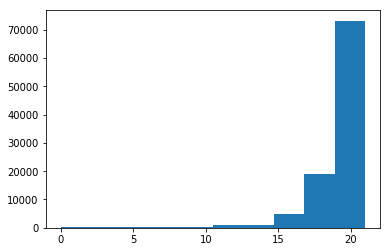

In [9]:
plt.hist(list(df.difficulty))
plt.show()
plt.close()

In [32]:
x, _, col = loadingKDD(nrows=100000, attack_mode=None)

/home/peseux/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
len(col)

122

In [34]:
col

['duration',
 'src_bytes',
 'dst_bytes',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'num_compromised',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'land',
 'logged_in',
 'root_shell',
 'is_host_login',
 'is_guest_login',
 'su_attempted',
 'protocol_type_icmp',
 'protocol_type_tcp',
 'protocol_type_udp',
 'flag_OTH',
 'flag_REJ',
 'flag_RSTO',
 'flag_RSTOS0',
 'flag_RSTR',
 'flag_S0',
 'flag_S1',
 'flag_S2',
 'flag_S3',
 'flag_SF',
 'flag_SH',
 'service_IRC',
 'service_X11',
 'service_Z39_50',
 'service_

In [39]:
x[None,0].shape

(1, 122)

In [40]:
x[0].shape

(122,)

In [45]:
x.transpose()[0].shape

(100000,)